In [2]:
import torch
import numpy as np
import pandas as pd
from torch import nn
from d2l import torch as d2l
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader
from torch.nn import functional as F
from sklearn.metrics import confusion_matrix


In [2]:
torch.__version__

'1.10.1'

In [3]:
df = pd.read_pickle('intra2021_label.pkl')

In [4]:
pd.set_option('display.min_row', 400)

In [5]:
df

,c,h,l,o,s,t,v,tt,symbol,label
0,2.310,2.310,2.310,2.310,ok,1609754520,200,2021-01-04 05:02:00-05:00,OVID,NaN
1,2.270,2.270,2.270,2.270,ok,1609755780,300,2021-01-04 05:23:00-05:00,OVID,NaN
2,2.250,2.250,2.250,2.250,ok,1609755840,415,2021-01-04 05:24:00-05:00,OVID,NaN
3,2.200,2.200,2.200,2.200,ok,1609755900,335,2021-01-04 05:25:00-05:00,OVID,NaN
4,2.230,2.230,2.230,2.230,ok,1609757160,554,2021-01-04 05:46:00-05:00,OVID,NaN
5,2.230,2.230,2.230,2.230,ok,1609757640,690,2021-01-04 05:54:00-05:00,OVID,NaN
6,2.230,2.230,2.230,2.230,ok,1609757880,6600,2021-01-04 05:58:00-05:00,OVID,NaN
7,2.270,2.270,2.270,2.270,ok,1609759980,148,2021-01-04 06:33:00-05:00,OVID,NaN
8,2.310,2.310,2.310,2.310,ok,1609761600,131,2021-01-04 07:00:00-05:00,OVID,NaN
9,2.310,2.310,2.310,2.310,ok,1609761660,884,2021-01-04 07:01:00-05:00,OVID,NaN


In [6]:
part = df.symbol.unique().tolist()[:5]+['DOYU','BILI']

In [7]:
df = df[df.symbol.isin(part)].copy()

In [8]:
df

,c,h,l,o,s,t,v,tt,symbol,label
0,2.31,2.31,2.310,2.310,ok,1609754520,200,2021-01-04 05:02:00-05:00,OVID,NaN
1,2.27,2.27,2.270,2.270,ok,1609755780,300,2021-01-04 05:23:00-05:00,OVID,NaN
2,2.25,2.25,2.250,2.250,ok,1609755840,415,2021-01-04 05:24:00-05:00,OVID,NaN
3,2.20,2.20,2.200,2.200,ok,1609755900,335,2021-01-04 05:25:00-05:00,OVID,NaN
4,2.23,2.23,2.230,2.230,ok,1609757160,554,2021-01-04 05:46:00-05:00,OVID,NaN
5,2.23,2.23,2.230,2.230,ok,1609757640,690,2021-01-04 05:54:00-05:00,OVID,NaN
6,2.23,2.23,2.230,2.230,ok,1609757880,6600,2021-01-04 05:58:00-05:00,OVID,NaN
7,2.27,2.27,2.270,2.270,ok,1609759980,148,2021-01-04 06:33:00-05:00,OVID,NaN
8,2.31,2.31,2.310,2.310,ok,1609761600,131,2021-01-04 07:00:00-05:00,OVID,NaN
9,2.31,2.31,2.310,2.310,ok,1609761660,884,2021-01-04 07:01:00-05:00,OVID,NaN


In [9]:
df = df.drop(columns='s')

In [10]:
df.t = df.t.astype('int32')
df.v = df.v.astype('int32')
symbol_list = pd.DataFrame(columns=['symbol', 'cus_id'])
symbol_list['symbol'] = df.symbol.unique().tolist()
symbol_list['cus_id'] = range(symbol_list.shape[0])
d = dict(symbol_list.values)
df['cus_symbol_id'] = df.symbol.replace(d)
df = df.drop('symbol', axis=1)
df['month'] = df.tt.dt.month.astype('int32')
df['day'] = df.tt.dt.day.astype('int32')
df['hour'] = df.tt.dt.hour.astype('int32')
df['minute'] = df.tt.dt.minute.astype('int32')
df['day_of_week'] = df.tt.dt.dayofweek.astype('int32')


In [11]:
for s in symbol_list['symbol']:
    stock = df[df.cus_symbol_id == d[s]].copy()
    index = stock.index.tolist()
    for price in ['c','h','l','o']:
        df.loc[index, f"{price}_pct"] = stock[price].pct_change(1).fillna(0)
    

In [12]:
def split_set(df, ratio=0.8):
    train_set = pd.DataFrame()
    test_set = pd.DataFrame()
    timelist = sorted(df.tt.dt.date.unique().tolist())
    length = len(timelist)
    split = int(np.floor(len(timelist)*ratio))
    split_time = timelist[split]
    
    train_set = df[df.tt.dt.date <= split_time]
    test_set = df[df.tt.dt.date > split_time]
    
    return train_set, test_set
    

In [13]:
train, test = split_set(df, 0.9)
train, val = split_set(train, 0.8)


In [14]:
train = train.drop(columns='tt', axis=1)
val = val.drop(columns='tt', axis=1)
test = test.drop(columns='tt', axis=1)

In [15]:
torch.cuda.device_count()

1

In [16]:
def try_gpu(i=0):  #@save
    """Return gpu(i) if exists, otherwise return cpu()."""
    if torch.cuda.device_count() >= i + 1:
        return torch.device(f'cuda:{i}')
    return torch.device('cpu')

In [17]:
try_gpu(i=0)

device(type='cuda', index=0)

In [27]:
def accuracy(y_hat, y): 
    """Compute the number of correct predictions."""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.type(y.dtype) == y
    return float(cmp.type(y.dtype).sum())

def get_precision_recall_gpu(y_pred, y, is_training=False):
    assert y.ndim == 1
    assert y_pred.ndim == 1 or y_pred.ndim == 2
    
    if y_pred.ndim == 2:
        y_pred = y_pred.argmax(dim=1)
        
    
    tp = (y * y_pred).sum().to(torch.float32)
    tn = ((1 - y) * (1 - y_pred)).sum().to(torch.float32)
    fp = ((1 - y) * y_pred).sum().to(torch.float32)
    fn = (y * (1 - y_pred)).sum().to(torch.float32)
    
    
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    
    return precision,recall




class Accumulator:
    """For accumulating sums over `n` variables."""
    def __init__(self, n):
        self.data = [0.0] * n

    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]
    
    
def evaluate_accuracy_gpu(net, data_iter, device=None): #@save
    """Compute the accuracy for a model on a dataset using a GPU."""
    if isinstance(net, nn.Module):
        net.eval()  # Set the model to evaluation mode
        if not device:
            device = next(iter(net.parameters())).device
    # No. of correct predictions, no. of predictions
    metric = Accumulator(2)

    with torch.no_grad():
        for X, y in data_iter:
            if isinstance(X, list):
                # Required for BERT Fine-tuning (to be covered later)
                X = [x.to(device) for x in X]
            else:
                X = X.to(device)
            y = y.to(device)
            y_hat = net(X)
            metric.add(accuracy(y_hat, y), y.numel())
    return metric[0] / metric[1]
    


In [7]:
a = torch.tensor([0,1,1,0,1,1])
b = torch.tensor([1,1,0,1,1,1])

In [8]:
c = a*b
c.sum().to(torch.float32)

tensor(3.)

In [19]:

def train_cnn(net, train_iter, test_iter, num_epochs, lr, device):
    """Train a CNN model with a GPU."""
    def init_weights(m):
        if type(m) == nn.Linear or type(m) == nn.Conv2d:
            nn.init.xavier_uniform_(m.weight)
    net.apply(init_weights)
    print('training on', device)
    net.to(device)
    optimizer = torch.optim.SGD(net.parameters(), lr=lr)
    loss = nn.CrossEntropyLoss()
#     animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs],
#                             legend=['train loss', 'train acc', 'test acc'])
    timer, num_batches = d2l.Timer(), len(train_iter)
    for epoch in range(num_epochs):
        # Sum of training loss, sum of training accuracy, no. of examples
        metric = Accumulator(3)
        net.train()
        print(f"The {epoch} epoch begins")
        for i, (X, y) in enumerate(train_iter):
            timer.start()
            optimizer.zero_grad()
            X, y = X.to(device), y.to(device)
            y_hat = net(X)
            l = loss(y_hat, y)
            l.backward()
            optimizer.step()
            with torch.no_grad():
                metric.add(l * X.shape[0], accuracy(y_hat, y), X.shape[0])
            timer.stop()
            train_l = metric[0] / metric[2]
            train_acc = metric[1] / metric[2]
            if (i + 1) % (num_batches // 5) == 0 or i == num_batches - 1:
                animator.add(epoch + (i + 1) / num_batches,
                             (train_l, train_acc, None))
        test_acc = evaluate_accuracy_gpu(net, test_iter)
        animator.add(epoch + 1, (None, None, test_acc))

        print(f"The {epoch} epoch ends")
    print(f'loss {train_l:.5f}, train acc {train_acc:.5f}, '
          f'test acc {test_acc:.5f}')
    print(f'{metric[2] * num_epochs / timer.sum():.1f} examples/sec '
          f'on {str(device)}')


In [20]:
class Residual(nn.Module):
    """The Residual block of ResNet."""
    def __init__(self, input_channels, num_channels,
                 use_1x1conv=False, strides=1):
        super().__init__()
        self.conv1 = nn.Conv2d(input_channels, num_channels,
                               kernel_size=3, padding=1, stride=strides)
        self.conv2 = nn.Conv2d(num_channels, num_channels,
                               kernel_size=3, padding=1)
        if use_1x1conv:
            self.conv3 = nn.Conv2d(input_channels, num_channels,
                                   kernel_size=1, stride=strides)
        else:
            self.conv3 = None
        self.bn1 = nn.BatchNorm2d(num_channels)
        self.bn2 = nn.BatchNorm2d(num_channels)

    def forward(self, X):
        Y = F.relu(self.bn1(self.conv1(X)))
        Y = self.bn2(self.conv2(Y))
        if self.conv3:
            X = self.conv3(X)
        Y += X
        return F.relu(Y)
    
    


In [21]:
b1 = nn.Sequential(nn.Conv2d(1, 64, kernel_size=3, stride=(2,1), padding= 1),
                   nn.BatchNorm2d(64), nn.ReLU(),
                   nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

def resnet_block(input_channels, num_channels, num_residuals,
                 first_block=False):
    blk = []
    for i in range(num_residuals):
        if i == 0 and not first_block:
            blk.append(Residual(input_channels, num_channels,
                                use_1x1conv=True, strides=2))
        else:
            blk.append(Residual(num_channels, num_channels))
    return blk

def resnet_block_cus(input_channels, num_channels, num_residuals,
                 first_block=False):
    blk = []
    for i in range(num_residuals):
        if i == 0 and not first_block:
            blk.append(Residual(input_channels, num_channels,
                                use_1x1conv=True, strides=1))
        else:
            blk.append(Residual(num_channels, num_channels))
    return blk

b2 = nn.Sequential(*resnet_block(64, 64, 2, first_block=True))
b3 = nn.Sequential(*resnet_block(64, 128, 2))
b4 = nn.Sequential(*resnet_block_cus(128, 256, 2))
b5 = nn.Sequential(*resnet_block_cus(256, 512, 2))

net = nn.Sequential(b1, b2, b3, b4, b5,
                    nn.AdaptiveAvgPool2d((1,1)),
                    nn.Flatten(), nn.Linear(512, 2))

In [22]:
X = torch.rand(size=(1, 1, 30, 16))
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__,'output shape:\t', X.shape)

Sequential output shape:	 torch.Size([1, 64, 8, 8])
Sequential output shape:	 torch.Size([1, 64, 8, 8])
Sequential output shape:	 torch.Size([1, 128, 4, 4])
Sequential output shape:	 torch.Size([1, 256, 4, 4])
Sequential output shape:	 torch.Size([1, 512, 4, 4])
AdaptiveAvgPool2d output shape:	 torch.Size([1, 512, 1, 1])
Flatten output shape:	 torch.Size([1, 512])
Linear output shape:	 torch.Size([1, 2])


In [23]:
class SequenceDataset(Dataset):
    def __init__(self, dataframe, features, target, sequence_length=30):
        self.features = features
        self.target = target
        self.sequence_length = sequence_length
        self.y = torch.tensor(dataframe[target].values).to(torch.int64)
        self.X = torch.tensor(dataframe[features].values).float()

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, i): 
        if i >= self.sequence_length-1:
            i_start = i - self.sequence_length + 1
            x = self.X[i_start:(i + 1), :]
        else:
            padding = self.X[0].repeat(self.sequence_length - i - 1, 1)
            x = self.X[0:(i + 1), :]
            x = torch.cat((padding, x), 0)

        return x.unsqueeze(0), self.y[i]
    
def get_SequenceDataset(dataframe, sequence_length=30):
    symbol_list = dataframe.cus_symbol_id.unique().tolist()
    features = dataframe.drop(columns='label').columns.tolist()
    target = 'label'
    output = []
    for s in symbol_list:
        symbol_df = dataframe[dataframe.cus_symbol_id == s]
        symbol_dataset = SequenceDataset(symbol_df, features, target, sequence_length)
        notna_index = torch.where(~torch.isnan(torch.tensor(symbol_df[target].values)))[0]
        symbol_dataset = torch.utils.data.Subset(symbol_dataset, notna_index)
        output = torch.utils.data.ConcatDataset([output,symbol_dataset])
        
    return output
        

In [24]:
# class TimeSeriesDataSet(data.Dataset):

#     def __init__(self, tensor_dir, transform, window_size, stride):

#         self.tensor_directory = tensor_dir
#         self.transform = transform
#         self.files = os.listdir(tensor_dir)
#         self.window_size = window_size
#         self.stride = stride
#         self.data_tuples = []

#         for f in self.files:
#             file = os.path.join(tensor_dir, f)
#             data, label = torch.load(file)

#             # pad with zeros with tensor is not of right length
#             if data.size(0) % self.window_size != 0:
#                 zeros = torch.zeros(abs(self.window_size - (data.size(0) % self.window_size)), data.size(1)).double()
#                 data = torch.cat((data, zeros), axis=0)

#             idxs = [i for i in range(0, data.size(0) - self.window_size, self.stride)]

#             if len(idxs) == 0:
#                 continue

#             for j in idxs:
#                 data_tuple = (file, j, label)
#                 self.data_tuples.append(data_tuple)

#         shuffle(self.data_tuples)

#     def __len__(self):
#         return len(self.data_tuples)

#     def __getitem__(self, idx):

#         if torch.is_tensor(idx):
#             idx = idx.tolist()

#         sample_tuple = self.data_tuples[idx]
#         sample, _ = torch.load(sample_tuple[0])
#         label = sample_tuple[2]
#         sample = sample[sample_tuple[1]: sample_tuple[1] + self.window_size]

#         if self.transform:
#             sample = self.transform(sample)

#         return {'sample': sample, 'label': label}

In [25]:
train = get_SequenceDataset(train)
val = get_SequenceDataset(val)

In [28]:
lr, num_epochs, batch_size = 0.05, 10, 4096
train_iter = DataLoader(train, batch_size=4096, shuffle=False)
test_iter = DataLoader(val, shuffle=False)
train_cnn(net, train_iter, test_iter, num_epochs, lr, try_gpu())

training on cuda:0
The 0 epoch begins
Precision: 0.0, Recall: nan
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision:

Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 0.0, Reca

Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Reca

Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 1.0, Recall: 1.0
Precision: 0.0, Reca

Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 0.0, Recall: nan
Precision: 1.0, Recall: 1.0
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Reca

Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 0.0, Recall: nan
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 1.0, Recall: 1.0
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Reca

Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 0.0, Recall: nan
Precision: 1.0, Recall: 1.0
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Reca

Precision: 1.0, Recall: 1.0
Precision: 0.0, Recall: nan
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Reca

Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 1.0, Recall: 1.0
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 0.0, Reca

Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 1.0, Recall: 1.0
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 1.0, Recall: 1.0
Precision: 1.0, Reca

Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 0.0, Recall: nan
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Reca

Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Reca

Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 0.0, Recall: nan
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Reca

Precision: 1.0, Recall: 1.0
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 1.0, Recall: 1.0
Precision: 0.0, Recall: nan
Precision: 1.0, Recall: 1.0
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Reca

Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 1.0, Recall: 1.0
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Reca

Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 0.0, Recall: nan
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Reca

Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Reca

Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Reca

Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Reca

Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Reca

Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 0.0, Recall: nan
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Reca

Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 1.0, Recall: 1.0
Precision: 1.0, Reca

Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 0.0, Recall: nan
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 1.0, Recall: 1.0
Precision: 0.0, Recall: nan
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Reca

Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Reca

Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 0.0, Recall: nan
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Reca

Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 0.0, Recall: nan
Precision: 1.0, Recall: 1.0
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Reca

Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Reca

Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Reca

Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 1.0, Recall: 1.0
Precision: 0.0, Recall: nan
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Reca

Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 1.0, Recall: 1.0
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Reca

Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Reca

Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Reca

Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Reca

Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 0.0, Recall: nan
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 0.0, Reca

Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 1.0, Recall: 1.0
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 1.0, Recall: 1.0
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 0.0, Recall: nan
Precision: 1.0, Recall: 1.0
Precision: 1.0, Reca

KeyboardInterrupt: 

In [ ]:
d['OSTK']

In [ ]:
OSTK = df[df.cus_symbol_id == d['OSTK']].copy()

In [ ]:
OVID = df[df.cus_symbol_id == d['OVID']].copy()

In [ ]:
aa = pd.concat([OSTK, OVID], axis=0)

In [ ]:
x,y = torch.utils.data.ConcatDataset([[],a])[0]


In [ ]:
OSTK = OSTK.drop('tt', axis=1)

In [ ]:
# aaa = get_SequenceDataset(OSTK)

In [ ]:
# aaaa = DataLoader(aaa, batch_size=30, shuffle=False)

In [ ]:
# for i, (X, y) in enumerate(aaaa):
#     print(i, (X, y))

In [ ]:
symbol_list = OSTK.cus_symbol_id.unique().tolist()
features = OSTK.drop(columns='label').columns.tolist()
target = 'label'

In [ ]:
a = SequenceDataset(OSTK, features, target, 30)

In [ ]:
b = torch.tensor(OSTK['label'].values)

In [ ]:
na_index = torch.where(~torch.isnan(b))[0]

In [ ]:
na_index

In [ ]:
x,y = torch.utils.data.Subset(a, na_index)[0]

In [ ]:
x

In [ ]:
c = SequenceDataset()

In [ ]:
len(c)

In [ ]:
b[na_index]

In [ ]:
timelist = OSTK.tt.dt.date.unique().tolist()

In [ ]:
len(train)

In [ ]:
len(train_iter)

9 epoch ends
loss 0.697, train acc 0.494, test acc 0.498
6813.8 examples/sec on cuda:0


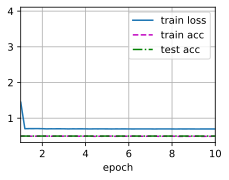

In [26]:
lr, num_epochs, batch_size = 0.05, 10, 4096
train_iter = DataLoader(train, batch_size=4096, shuffle=False)
test_iter = DataLoader(val, shuffle=False)
train_cnn(net, train_iter, test_iter, num_epochs, lr, try_gpu())

In [ ]:
torch.cuda.empty_cache()

In [ ]:
torch.cuda.memory_summary(device=try_gpu(), abbreviated=False)

In [ ]:
train_iter, test_iter = d2l.load_data_fashion_mnist(256, resize=96)

In [ ]:
for i, (X, y) in enumerate(train_iter):
    print(i, (X, y))

In [ ]:
a = np.array(range(100))

In [ ]:
a = a.reshape((20,5))

In [ ]:
a = torch.tensor(a,device='cuda:0')

In [ ]:
a

In [ ]:
a.unfold(0,10,1)